11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0438 - val_loss: 0.0094
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0081 - val_loss: 0.0054
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0053 - val_loss: 0.0045
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0040 - val_loss: 0.0039


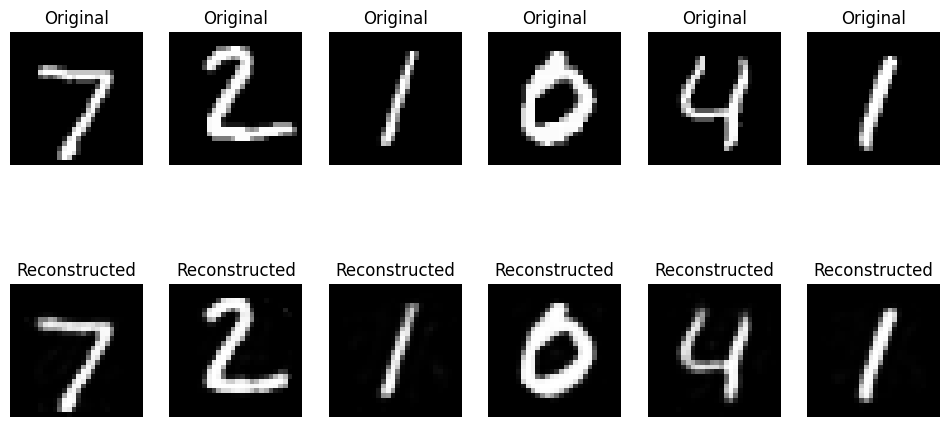

In [1]:
#LAB01
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

class SimpleAutoencoder(Model):
  def __init__(self, latent_dimen):
    super(SimpleAutoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Flatten(),
        layers.Dense(latent_dimen, activation = 'relu')
    ])

    self.decoder = tf.keras.Sequential([
        layers.Dense(28*28, activation='sigmoid'),
        layers.Reshape((28, 28, 1))
    ])

  def call(self, input_data):
    encoded = self.encoder(input_data)
    decoded = self.decoder(encoded)
    return decoded

latent_dimensions = 64
autoencoder = SimpleAutoencoder(latent_dimensions)
autoencoder.compile(optimizer = 'adam', loss = losses.MeanSquaredError())

autoencoder.fit(x_train, x_train, epochs = 10, shuffle = True, validation_data = (x_test, x_test))

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 6
plt.figure(figsize=(12, 6))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title('Original')
  plt.axis('off')

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
  plt.title('Reconstructed')
  plt.axis('off')

plt.show()

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError

mse = MeanSquaredError()
reconstruction_loss = mse(x_test, decoded_imgs).numpy()

print(f'Reconstruction Loss (MSE): {reconstruction_loss}')


Reconstruction Loss (MSE): 0.003859206335619092
